In [1]:
#Imports packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
#Reading CSV files
google_apps = pd.read_csv("source/Google_Apps_Clean.csv")
google_app_reviews= pd.read_csv("source/googleplaystore_user_reviews.csv")
apple_apps= pd.read_csv("source/Apple_Apps_Clean.csv")

In [3]:
#Barry start 

# Data Cleaning
The first part of my section is to clean the csv files. To prevent conflicts in git we have updated the file names in the above cells with the files I made at the end of this section. I have commented out the code I used to make them as it will not work with the new file names.

In [4]:
# #Looking at the Google Play Store Data
# google_apps.head()

In [5]:
# google_apps2 = google_apps
# google_apps2.head()

In [6]:
# #Looking at number of installs
# google_apps2['Installs'].unique()

In [7]:
# #Something funny going on, looking to see why a Install count is called Free
# google_apps2.loc[google_apps2['Installs'] == 'Free']

In [8]:
# #Found the troublesome row on the play store website, its category is Lifestyle. Checking to see if there is a lifestyle label in our dataframe.
# google_apps2['Category'].unique()

In [9]:
# #Converting row to array for easier manipluation. Insert category and delete the last 'nan'
# arr = google_apps2.loc[google_apps2['Installs'] == 'Free'].values
# arr = np.insert(arr,1,'LIFESTYLE')
# arr = np.delete(arr, -1)
# arr

In [10]:
# #Changing the bad row to the new values
# google_apps2.loc[google_apps2['Installs'] == 'Free'] = arr

In [11]:
# #Checking to see if it worked
# google_apps2.iloc[10472]

In [12]:
# #Checking to see if it worked
# google_apps2['Category'].unique()

In [13]:
# #convert installs row to int 
# google_apps2['Installs'] = pd.to_numeric(list(map(lambda x: x.replace('+',''), map(lambda x: x.replace(',',''), google_apps2['Installs']))))
# google_apps2.head()

In [14]:
# #Looking at Size column values
# google_apps2['Size'].unique()

In [15]:
# #defining a function to help clean turn values into ints
# def M_to_k(string):
#     number = 0
#     if 'M' in string:
#         number = float(string.replace('M',''))
#         number = number*1000
#     elif 'k' in string:
#         number = float(string.replace('k',''))
#     number = int(number)
#     #if number == 0:
#         #number = float('NaN')
#     return number;

In [16]:
# #changing size column to numerics
# google_apps2['Size'] = list(map(M_to_k, google_apps2['Size']))
# google_apps2.head()

In [17]:
# google_apps2 = google_apps2.rename(columns = {'Size':'Size in KB'})
# google_apps2.head()

In [18]:
# #looking at apple apps dataframe
# apple_apps.head()

In [19]:
# apple_apps2 = apple_apps
# apple_apps2.head()

In [20]:
# #deleting id column as it doesnt mean anything to us
# del apple_apps2['id']
# apple_apps2.head()

In [21]:
# apple_apps2['currency'].unique()

In [22]:
# #all currency values are USD. Deleting
# del apple_apps2['currency']
# apple_apps2.head()

In [23]:
# apple_apps2['game_enab'].unique()

In [24]:
# del apple_apps2['game_enab']
# apple_apps2.head()

In [25]:
# apple_apps2['vpp_lic'].unique()

In [26]:
# del apple_apps2['vpp_lic']
# apple_apps2.head()

In [27]:
# #deleting non-useful columns
# del apple_apps2['ipadSc_urls.num']
# del apple_apps2['sup_devices.num']
# del apple_apps2['rating_count_ver']
# del apple_apps2['user_rating_ver']
# apple_apps2.head()

In [28]:
# apple_apps2['size_bytes'] = list(map(lambda x: int(x/1000),apple_apps2['size_bytes']))
# apple_apps2.head()

In [29]:
# apple_apps2 = apple_apps2.rename(columns = {'track_name':'App','size_bytes':'Size in KB','price':'Price','rating_count_tot':'Reviews','user_rating':'Rating','ver':'Current Version','cont_rating':'Content Rating','prime_genre':'Category','lang.num':'Number of Languages'})
# apple_apps2.head()

In [30]:
# apple_apps2 = apple_apps2[['App','Category','Rating','Reviews','Size in KB','Price','Content Rating','Current Version','Number of Languages']]
# apple_apps2.head()

In [31]:
# apple_apps2['Content Rating'].value_counts()

In [32]:
# google_apps2['Content Rating'].value_counts()

In [33]:
# def ContentConverter(string):
#     if string == '4+':
#         string = 'Everyone'
#     elif string == '9+':
#         string = 'Everyone 10+'
#     elif string == '12+':
#         string = 'Teen'
#     elif string == '17+':
#         string = 'Mature 17+'
#     else:
#         string = 'Unrated'
#     return string;   

In [34]:
# #Standardizing content ratings
# apple_apps2['Content Rating'] = list(map(ContentConverter, apple_apps2['Content Rating']))
# apple_apps2['Content Rating'].value_counts()

In [35]:
# apple_apps2.head()

In [36]:
# apple_categories = list(apple_apps2['Category'].unique())
# del apple_categories[10]
# apple_categories

In [37]:
# apple_categories.sort()
# apple_categories

In [38]:
# list(google_apps2['Category'].unique())

In [39]:
# test_column = list(map(lambda x: x.replace('_',' '), google_apps2['Category']))

In [40]:
# test_column = list(map(lambda x: x.title() , test_column))

In [41]:
# test_column = list(map(lambda x: x.replace('And','&'),test_column))

In [42]:
# google_apps2['Category'] = test_column
# google_apps2.head()

In [43]:
# list(google_apps2['Category'].unique())

In [44]:
# categories = list(google_apps2['Category'].unique())

In [45]:
# categories.extend(apple_categories)

In [46]:
# categories.sort()

In [47]:
# categories

In [48]:
# def nan_handler(input):
#     output = ''
#     if isinstance(input, str):
#         output = input
#     else:
#         output = 'None'
#     return output;

        

In [49]:
# apple_apps2['Category'] = list(map(nan_handler, apple_apps2['Category']))

In [50]:
# apple_apps2['Category'] = list(map(lambda x: x.replace('Games','Game'), apple_apps2['Category']))

In [51]:
# apple_apps2['Category'] = list(map(lambda x: x.replace('Navigation','Maps & Navigation'), apple_apps2['Category']))

In [52]:
# apple_apps2['Category'] = list(map(lambda x: x.replace('News','News & Magazines'), apple_apps2['Category']))

In [53]:
# apple_apps2['Category'] = list(map(lambda x: x.replace('Book','Books & Reference'), apple_apps2['Category']))

In [54]:
# apple_apps2['Category'] = list(map(lambda x: x.replace('Reference','Books & Reference'), apple_apps2['Category']))

In [55]:
# apple_apps2['Category'] = list(map(lambda x: x.replace('Social Networking','Social'), apple_apps2['Category']))

In [56]:
# apple_apps2['Category'] = list(map(lambda x: x.replace('Travel','Travel & Local'), apple_apps2['Category']))

In [57]:
# apple_apps2['Category'].unique()

In [58]:
# apple_apps2['Category'] = list(map(lambda x: x.replace('Books & Books & Reference','Books & Reference'), apple_apps2['Category']))

In [59]:
# apple_apps2['Category'].unique()

In [60]:
# apple_apps2.head()

In [61]:
# google_apps2.head()

In [62]:
# google_apps2 = google_apps2.rename(columns = {'Current Ver': 'Current Version'})
# google_apps2.head()

In [63]:
# import os

In [64]:
# output_google = os.path.join("source","Google_Apps_Clean.csv")
# google_apps2.to_csv(output_google, index = False, header = True)

In [65]:
# output_apple = os.path.join('source','Apple_Apps_Clean.csv')
# apple_apps2.to_csv(output_apple, index = False, header = True)

In [66]:
google_apps.head()

,App,Category,Rating,Reviews,Size in KB,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Version,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art & Design,4.1,159.0,19000,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,Art & Design,3.9,967.0,14000,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art & Design,4.7,87510.0,8700,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,Art & Design,4.5,215644.0,25000,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,Art & Design,4.3,967.0,2800,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [67]:
select_data1 = pd.DataFrame(google_apps, columns = ['App','Category','Installs','Size in KB'])
select_data1.head()

,App,Category,Installs,Size in KB
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art & Design,10000,19000
1,Coloring book moana,Art & Design,500000,14000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art & Design,5000000,8700
3,Sketch - Draw & Paint,Art & Design,50000000,25000
4,Pixel Draw - Number Art Coloring Book,Art & Design,100000,2800


In [68]:
select_data1 = select_data1.drop_duplicates()

In [69]:
select_data1_group1 = select_data1.groupby( by = select_data1['Installs'])
check_this_out1 = select_data1_group1.mean()
check_this_out1

,Size in KB
Installs,
0,12160.000000
1,13598.059701
5,13332.439024
10,13483.015584
50,15947.348039
100,13309.953521
500,11984.472561
1000,13754.268238
5000,13245.779915


In [70]:
x_axis = np.arange(len(check_this_out1.index))
x_axis

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

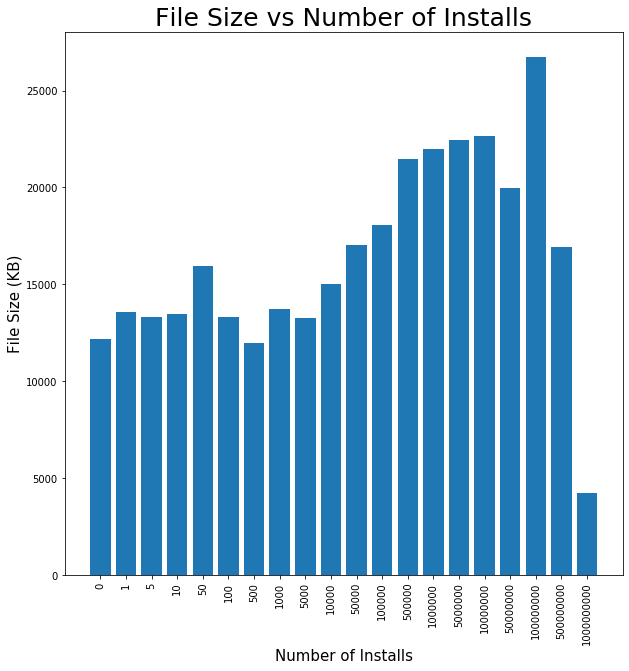

In [71]:
plt.figure(figsize = [10,10])
#check_this_out1.plot.bar()
plt.bar(x_axis, list(check_this_out1['Size in KB']))
plt.title('File Size vs Number of Installs',fontsize = 25)
plt.xlabel('Number of Installs',fontsize = 15)
plt.ylabel('File Size (KB)',fontsize = 15)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, check_this_out1.index, rotation = 'vertical')
plt.savefig('images/File_Size_vs_Installs_BJT.png')
plt.show()

In [72]:
from scipy.stats import chisquare

In [73]:
chisquare(select_data1['Installs'])

Power_divergenceResult(statistic=3629564817814.9375, pvalue=0.0)

In [74]:
select_data1['Size in KB'].mean()

17886.551091524034

In [75]:
select_data1_group1.count()['Size in KB']

Installs
0               15
1               67
5               82
10             385
50             204
100            710
500            328
1000           891
5000           468
10000         1032
50000          469
100000        1116
500000         510
1000000       1431
5000000        621
10000000       965
50000000       211
100000000      204
500000000       27
1000000000      21
Name: Size in KB, dtype: int64

In [76]:
select_data1.loc[select_data1['Installs'] == 1000000000]

,App,Category,Installs,Size in KB
152,Google Play Books,Books & Reference,1000000000,0
335,Messenger – Text and Video Chat for Free,Communication,1000000000,0
336,WhatsApp Messenger,Communication,1000000000,0
338,Google Chrome: Fast & Secure,Communication,1000000000,0
340,Gmail,Communication,1000000000,0
341,Hangouts,Communication,1000000000,0
391,Skype - free IM & video calls,Communication,1000000000,0
865,Google Play Games,Entertainment,1000000000,0
1654,Subway Surfers,Game,1000000000,76000
2544,Facebook,Social,1000000000,0


In [77]:
select_data1_group2 = select_data1.loc[select_data1['Category']=='Game'].groupby(by = select_data1['Installs'])
check_this_out2 = select_data1_group2.mean()
check_this_out2

,Installs,Size in KB
Installs,,
1,1.000000e+00,10000.000000
5,5.000000e+00,24000.000000
10,1.000000e+01,21573.333333
50,5.000000e+01,21836.363636
100,1.000000e+02,21266.666667
500,5.000000e+02,20383.333333
1000,1.000000e+03,25702.275000
5000,5.000000e+03,21747.058824
10000,1.000000e+04,30326.562500


In [78]:
select_data1_group2.count()

,App,Category,Installs,Size in KB
Installs,,,,
1,5,5,5,5
5,2,2,2,2
10,15,15,15,15
50,11,11,11,11
100,27,27,27,27
500,12,12,12,12
1000,40,40,40,40
5000,17,17,17,17
10000,64,64,64,64


In [79]:
x_axis = np.arange(len(check_this_out2.index))
x_axis

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

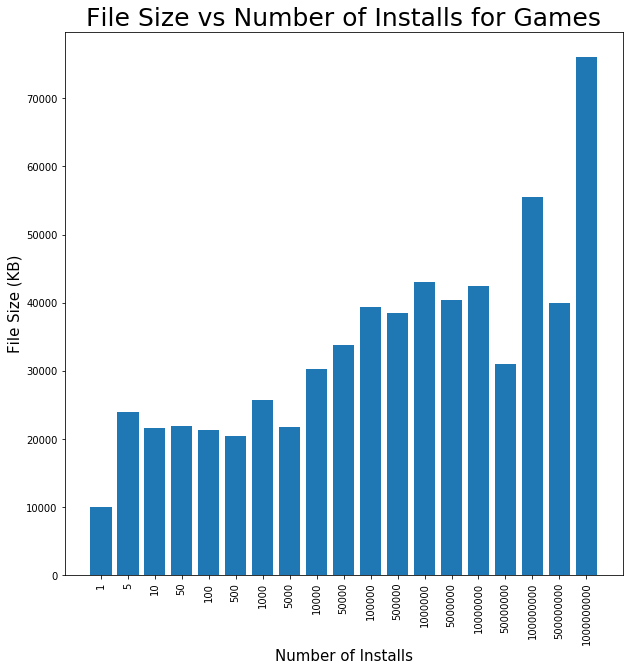

In [80]:
plt.figure(figsize = [10,10])
plt.bar(x_axis, list(check_this_out2['Size in KB']))
plt.title('File Size vs Number of Installs for Games',fontsize = 25)
plt.xlabel('Number of Installs',fontsize = 15)
plt.ylabel('File Size (KB)',fontsize = 15)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, check_this_out2.index, rotation = 'vertical')
plt.savefig('images/File_Size_vs_Installs_Games_BJT.png')
plt.show()

In [81]:
from scipy.stats import linregress
line = linregress(check_this_out2.index, check_this_out2['Size in KB'])
line

LinregressResult(slope=4.2926352325743594e-05, intercept=29760.776855347125, rvalue=0.710846700181021, pvalue=0.000645952342313771, stderr=1.0301327584351316e-05)

In [82]:
line[0]

4.2926352325743594e-05

In [83]:
log_axis = np.log10(check_this_out2.index)
log_axis

Float64Index([               0.0, 0.6989700043360189,                1.0,
              1.6989700043360187,                2.0, 2.6989700043360187,
                             3.0, 3.6989700043360187,                4.0,
               4.698970004336019,                5.0,  5.698970004336019,
                             6.0,  6.698970004336019,                7.0,
               7.698970004336019,                8.0,  8.698970004336019,
                             9.0],
             dtype='float64', name='Installs')

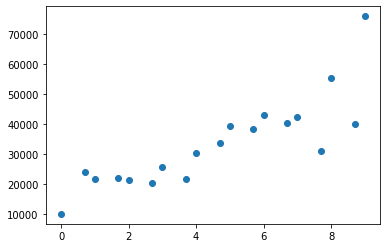

In [84]:
plt.scatter(log_axis,check_this_out2['Size in KB'])
plt.show()

In [85]:
line2 = linregress(log_axis, check_this_out2['Size in KB'])
line2

LinregressResult(slope=4498.742539761053, intercept=12857.903169080404, rvalue=0.8422109071498416, pvalue=6.095315681878163e-06, stderr=698.4800102941879)

In [86]:
line3 = linregress(check_this_out2['Size in KB'], log_axis)
line3

LinregressResult(slope=0.00015767055034890574, intercept=-0.6918527646768231, rvalue=0.8422109071498416, pvalue=6.095315681878163e-06, stderr=2.4480113422237185e-05)

In [87]:
#y = mx + b
def line_eq(x):
    return line3[0]*x+line3[1]


In [88]:
line_eq(10000)


0.8848527388122343

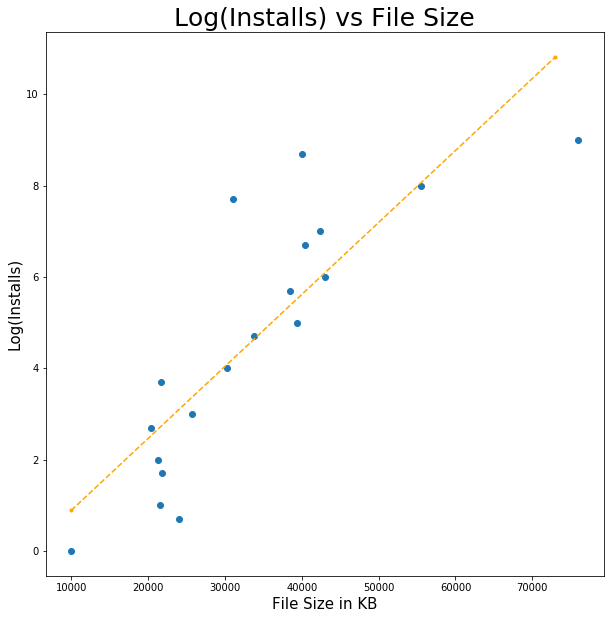

In [89]:
plt.figure(figsize = [10,10])
plt.scatter(check_this_out2['Size in KB'], log_axis)#,check_this_out2['Size in KB'])
plt.title('Log(Installs) vs File Size', fontsize = 25)
plt.xlabel('File Size in KB', fontsize = 15)
plt.ylabel('Log(Installs)',fontsize = 15)
plt.plot([10000,73000],[line_eq(10000),line_eq(73000)], color='orange', marker='.', linestyle='dashed')
plt.savefig('images/Log_Installs_vs_File_Size_BJT.png')
plt.show()

In [90]:
#Barry end

In [91]:
# Sam start

# Found the count for each column in the Google dataframe to look for missing values using the count function.
google_apps.count()

In [ ]:
# Dropped any null rows using the dropna function.
google_apps = google_apps.dropna(how='any')
google_apps.count()

In [ ]:
# Found the count for each column in the Apple dataframe to look for missing values using the count function.
apple_apps.count()

In [ ]:
# Dropped any null rows using the dropna function.
apple_apps = apple_apps.dropna(how='any')
apple_apps.count()

In [ ]:
# Renamed the Rating column to Google Rating with the rename column function.
google_apps = google_apps.rename(columns={"Rating": "Google Rating"})

# Renamed the Rating column to Apple Rating with the rename column function.
apple_apps = apple_apps.rename(columns={"Rating": "Apple Rating"})

In [ ]:
# Used GroupBy function in order to separate the data into fields according to "Category" values.
google_apps_category = google_apps.groupby("Category")

# Got the average of the Rating column in the GroupBy object using the mean function.
google_apps_mean = google_apps_category[["Google Rating"]].mean()
google_apps_mean

In [92]:
# Used GroupBy function in order to separate the data into fields according to "Category" values.
apple_apps_category = apple_apps.groupby("Category")

# Got the average of the Rating column in the GroupBy object using the mean function.
apple_apps_mean = apple_apps_category[["Apple Rating"]].mean()
apple_apps_mean

In [ ]:
# Merged both dataframes together based on the Categories they share by using the merge function.
google_apple_merge = pd.merge(google_apps_mean, apple_apps_mean, on="Category")
google_apple_merge

In [ ]:
# Renamed the Rating columns to Average Google and Average Apple Rating with the rename column function.
google_apple_merge = google_apple_merge.rename(columns={"Google Rating": "Average Google Rating", "Apple Rating": "Average Apple Rating"})

# Reset the index so that the index is now based on the different Categories.
google_apple_merge = google_apple_merge.reset_index()


In [ ]:

# Created a bar chart from the google_apple_merge dataframe comparing the average ratings of the app categories.
# Title will be 'Average Rating by Category'
# x-axis labels will be the different categories and the y-axis will be 'Average Rating'
ind = np.arange(len(google_apple_merge['Average Google Rating']))
width = 0.25

fig, ax = plt.subplots(figsize=(20, 7))
rects1 = ax.bar(ind - width/2, google_apple_merge['Average Google Rating'], width, label='Google')
rects2 = ax.bar(ind + width/2, google_apple_merge['Average Apple Rating'], width, label='Apple')


plt.ylim(0, 5)

ax.set_ylabel('Average Rating', fontsize=18)
ax.set_title('Average Rating by Category', fontsize=25)
ax.set_xticks(ind)
ax.set_xticklabels(google_apple_merge['Category'], rotation=45, fontsize=15)
plt.legend(['Average Google Rating', 'Average Apple Rating'], loc='upper right', fontsize=15)
plt.savefig("Images/avg_rting_sk_bgraph.png")



In [ ]:
# Found the average rating for all of the Google apps using the mean function.
google_pop = google_apps['Google Rating']
google_pop.mean()

In [ ]:
# Found the average rating for all of the Apple apps using the mean function.
apple_pop = apple_apps['Apple Rating']
apple_pop.mean()

In [ ]:
# Null Hypothesis: There is no difference in ratings between the common app categories included in the Google and Apple dataframes.

# Calculated the Independent (Two Sample) T-Test
stats.ttest_ind(google_pop, apple_pop, equal_var=False)

# The pvalue is less than .05 which tells us that the Null Hypothesis will be rejected and there is a significant difference.

#Sam end

In [93]:
#Abbas start

In [94]:
google_apps.count()
google_apps= google_apps.dropna(how='any')
google_apps.count()

apple_apps.count()
apple_apps = apple_apps.dropna(how='any')
apple_apps.count()

In [ ]:
# Data Frame - Top 5 paid google categories by spending
# Select only the paid apps

google_apps_paid = google_apps.loc[google_apps['Type']=="Paid",:]

# Convert the value
google_apps_paid.loc[:,'Price']=google_apps_paid['Price'].str.replace('$','')
google_apps_paid= google_apps_paid.astype({'Price': float})

google_apps_grouped = google_apps_paid.groupby('Category').agg(
                 total_games=('App', 'count'),
                 total_spending = ('Price', 'sum'))

google_apps_paid_top_5 = google_apps_grouped.sort_values('total_spending', ascending=False)
google_apps_paid_top_5 = google_apps_paid_top_5.reset_index()
google_apps_paid_top_5 = google_apps_paid_top_5.iloc[0:5]
google_apps_paid_top_5

In [ ]:
# plot a pie chart

labels = google_apps_paid_top_5['Category']
sizes =  google_apps_paid_top_5['total_spending']
explode = (0.1,0, 0, 0, 0)  

fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.pie(sizes, explode = explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, radius = 1.2)
plt.title('Top paid Google Apps by spending\n\n')
plt.show()
plt.savefig('images/as_google_total_spending.png')

In [ ]:
# Data Frame - Top 5 paid apple categories by spending
# Select only the paid apps

apple_apps_paid = apple_apps.loc[apple_apps['Price'] >0.00,:]

# Convert the value

apple_apps_paid= apple_apps_paid.astype({'Price': float})


apple_apps_grouped = apple_apps_paid.groupby('Category').agg(
                 total_games=('App', 'count'),
                 total_spending = ('Price', 'sum'))
                
apple_apps_paid_top_5 = apple_apps_grouped.sort_values('total_spending', ascending=False)
apple_apps_paid_top_5 = apple_apps_paid_top_5.reset_index()
apple_apps_paid_top_5
apple_apps_paid_top_5 = apple_apps_paid_top_5.iloc[0:5]
apple_apps_paid_top_5

In [ ]:
# plot a pie chart

labels = apple_apps_paid_top_5['Category']
sizes =  apple_apps_paid_top_5['total_spending']
explode = (0.1,0, 0, 0, 0)  

fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.pie(sizes, explode = explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, radius = 1.2)
plt.title('Top paid Apple Apps by spending\n\n')
plt.show()
plt.savefig('images/as_apple_total_spending.png')

In [ ]:
#Abbas end

In [95]:
#Farshad start

In [96]:
# Data Frame - Top 5 google categories by ratings
google_apps_df1 = google_apps.groupby('Category').agg(
                 total_games=('App', 'count'),
                 highest_rating = ('Rating', 'max'),
                 lowest_rating = ('Rating', 'min'),
                 sd = ('Rating', 'std'))

google_apps_top_5 = google_apps_df1.sort_values('total_games', ascending=False)
google_apps_top_5 = google_apps_top_5.reset_index()
google_apps_top_5 = google_apps_top_5.iloc[0:5]
google_apps_top_5


In [ ]:
# Pie Chart - Top 5 google category by total games
labels = google_apps_top_5['Category']
sizes =  google_apps_top_5['total_games']
explode = (0.1,0, 0, 0, 0)  

fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.pie(sizes, explode = explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, radius = 1.2)
plt.title("Top Five Google App Categories\n\n")
plt.show()
plt.savefig('images/fe_google_top_rating.png')

In [ ]:
# Data Frame - Top 5 apple categories by total games
apple_apps_df1 = apple_apps.groupby('Category').agg(
                  total_games= ('App', 'count'),
                  highest_rating = ('Rating', 'max'),
                  lowest_rating = ('Rating', 'min'),
                  sd = ('Rating', 'std'))


apple_apps_top_5 = apple_apps_df1.sort_values('total_games', ascending=False)
apple_apps_top_5 = apple_apps_top_5.reset_index()
apple_apps_top_5 = apple_apps_top_5.iloc[0:5]
apple_apps_top_5


In [ ]:
# Pie Chart - Top 5 apple category by total games
labels = apple_apps_top_5['Category']
sizes =  apple_apps_top_5['total_games']
explode = (0.1,0, 0, 0, 0)  

fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.pie(sizes, explode = explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, radius = 1.2)
plt.title("Top Five Apple App Categories\n\n")
plt.show()
plt.savefig('images/fe_apple_top_rating.png')

In [ ]:
# Unpaid apps in google and apple
google_apps_unpaid = google_apps.loc[google_apps['Type']=='Free',:]

apple_apps_unpaid = apple_apps.loc[apple_apps['Price']==0,:]


In [ ]:
import scipy.stats as stats
# Null Hypothesis: There is no difference in ratings between paid and unpaid apple apps
stats.ttest_ind(apple_apps_unpaid["Rating"], apple_apps_paid["Rating"], equal_var=False)


In [ ]:
# Null Hypothesis: There is no difference in ratings between paid google and apple apps
stats.ttest_ind(google_apps_paid.dropna()["Rating"], apple_apps_paid.dropna()["Rating"], equal_var=False)

In [ ]:
# Null Hypothesis: There is no difference in ratings between paid and unpaid google apps
stats.ttest_ind(google_apps_unpaid.dropna()["Rating"], google_apps_paid.dropna()["Rating"], equal_var=False)

In [ ]:
# Binning the apps by price ranges

bins = [0.00, 1.99, 3.99, 9.99, 499.99]
group_names = ['<$2','$2-4','$5-10','>$10']
google_apps_paid['Price Range'] = pd.cut(google_apps_paid['Price'], bins, labels=group_names)
google_apps_paid
apple_apps_paid['Price Range'] = pd.cut(apple_apps_paid['Price'], bins, labels=group_names)

google_apps_paid_ranges = google_apps_paid.groupby("Price Range").agg(
                         total_games= ('App', 'count' ))
google_apps_paid_ranges
apple_apps_paid_ranges = apple_apps_paid.groupby("Price Range").agg(
                           total_games = ('App', 'count'))

combined_paid_range = pd.merge(apple_apps_paid_ranges, google_apps_paid_ranges, how="inner", on="Price Range")
combined_paid_range = combined_paid_range.reset_index()
combined_paid_range

In [ ]:
# Plot Bar Chart
ind = np.arange(len(combined_paid_range['total_games_x']))
width = 0.25

fig, ax = plt.subplots(figsize=(20, 7))
rects1 = ax.bar(ind - width/2, combined_paid_range['total_games_x'], width, label='Apple games')
rects2 = ax.bar(ind + width/2, combined_paid_range['total_games_y'], width, label='Google games')

ax.set_ylabel('Total Games')
ax.set_title('Total Games by Price Range')
ax.set_xticks(ind)
ax.set_xticklabels(combined_paid_range['Price Range'], rotation=45)
plt.legend(['Apple', 'Google'], loc='upper right')
plt.show()
plt.savefig('images/fe_spending_ranges.png')

In [ ]:
#Farshad end